## Homework 8- Stability analysis

### 1. Finding the fixed points

To find the fixed points of the differential equation, one has to find the points for which the differential equations given in the excercise equal zero.



The first trivial solution of those equation is $N_i = P_i=0 , i \in \{1,2,3\}$.


Another solution  can be found by looking at the Velhurst growth limiting factors in the equations for  $N_i, i \in \{1,2,3\}$. When $P_i=0$, the fixed point condition is trivialy true for $\frac{dP_i}{dt}$
plugging this into the first three equations results in the following set of equations for $N_i$:

$$\frac{dN_i}{dt}=a_i-N_i=0, i \in \{1,2,3\}$$
 
So in total this results in the fixed point:
$$N_1=56\\N_2=12,\\N_3=35\\P_1=P_2=P_3=0$$

We are looking for a completely non-trivial fixed point though. Because of how the parameters of the equation are defined,
$N_i=P_i=1 , i \in \{1,2,3\}$ is another fixed point, and a non-trivial solution. 

Those are all three fixed point as specified on the homework sheet.



In [2]:
import numpy as np
from scipy import linalg
import scipy.linalg
import matplotlib.pyplot as plt

In [3]:
A = np.array([[-1, 0, 0, -20, -30, -5],
              [0, -1, 0, -1, -3, -7],
              [0, 0, -1, -4, -10, -20],
              [20, 30, 35, 0, 0, 0],
              [3 ,3 ,3, 0, 0, 0],
              [7, 8, 20, 0, 0, 0]])

In [4]:
ev,vecs = linalg.eig(A)

The (approximated) time evolution is
\begin{equation}
N(t)=N^*+\sum\limits_{i=1}^6c_iv_ie^{t\lambda_i}
\end{equation}
The $\lambda_i$ are the eigenvalues, $N^*$ are the values for the non-trivial fixed point and $c_n$ are the given coefficents

In [87]:
c = np.array([3, 3, 1, 1, -5, 0.1])
#Function to calculate N(t)
def f(t):      
     return np.array([1,1,1,1,1,1])+sum([c[i]*np.exp(t*ev[i])*np.array(vecs[:,i]) for i in range(5)])    

In [88]:
t = np.linspace(0, 3, 500)
pop_pred = [f(i) for i in t]
pop_pred_0 = [i[0] for i in pop_pred]

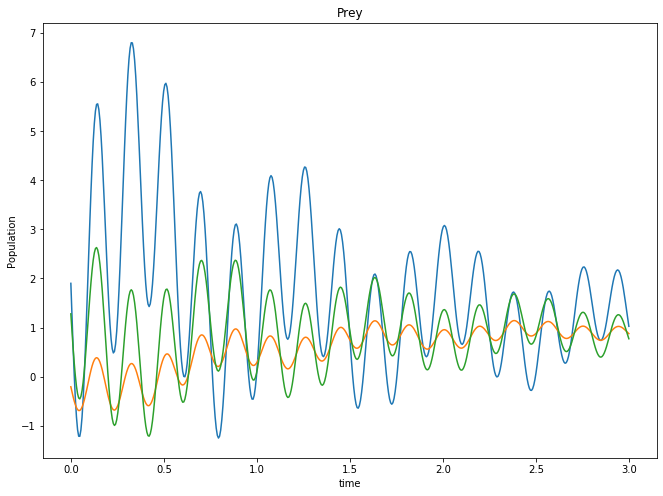

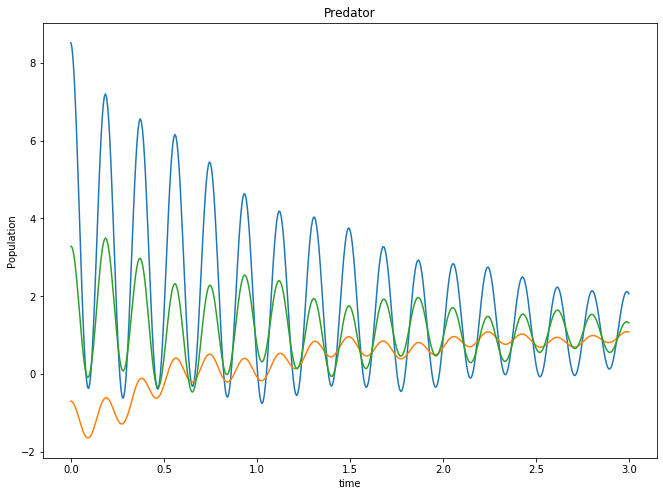

In [89]:
fig = plt.figure(figsize=(11,8))
plt.title("Prey")
plt.xlabel("time")
plt.ylabel("Population")
for i in range(3):
    plt.plot(t, [j[i] for j in pop_pred])
fig = plt.figure(figsize=(11,8))
plt.title("Predator")
plt.xlabel("time")
plt.ylabel("Population")
for i in range(3,6):
    plt.plot(t, [j[i] for j in pop_pred])